# Visualization of Data from my Fantasy Soccer Mini-League

This notebook is a continuation of my "Web-Scraping my Fantasy Soccer Mini-league" notebook. Here you will find the visualizations I put together with the data obtained from the web-scraping notebook. Please take a look at that notebook to check the web-scraping strategy I set for this project.

This notebook presents the following visualizations:

1. Top 10 Selected Captains in the Mini-League
2. Top 5 Team's Ending Performance
3. Top 5 Team's Captain Decision-Making
4. Correlations with Team's Final Score

## Top 10 Selected Captains in the Mini-League

In [10]:
import pandas as pd

from matplotlib import pyplot as plt

import seaborn as sns

import numpy as np

In [3]:
Captains_Total = pd.read_csv('Captains_Total.csv')

In [5]:
Captains_Total.columns = ['Cap', 'Points']

Captains_Total.head()

,Cap,Points
0,Salah,180
1,Vardy,155
2,De Bruyne,115
3,Agüero,98
4,Mané,96


### Captains Visualization

The following chart shows which where the 10 most selected captains in the mini-league and how many times they were selected.

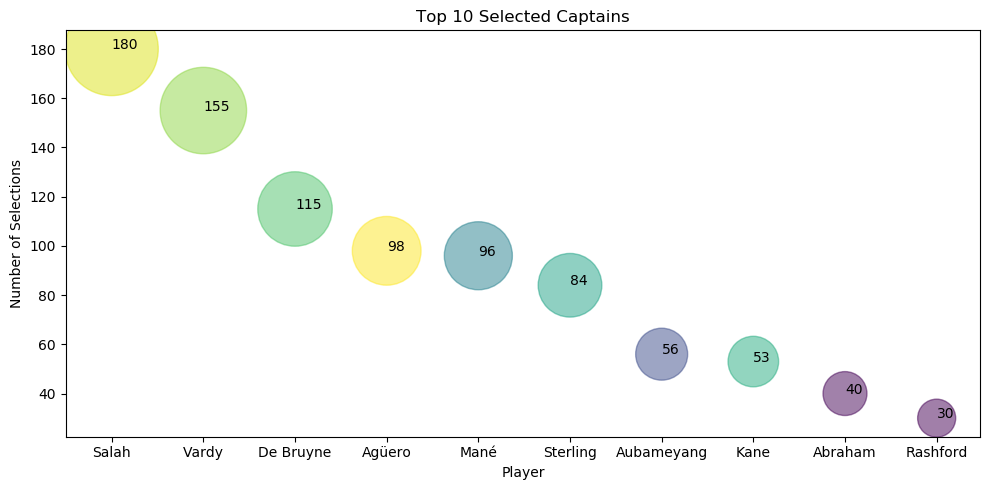

In [48]:
#Bubble Chart

plt.subplots(figsize=(10,5), dpi= 100)
plt.scatter(x = Captains_Total['Cap'][0:10],
            y = Captains_Total['Points'][0:10],
            s = Captains_Total['Points']*25,
            alpha = 0.5,
            c = np.random.rand(10))

plt.xlabel('Player')

plt.ylabel('Number of Selections')

plt.title('Top 10 Selected Captains')

#Annotate the bubbles
x,y = Captains_Total['Cap'][0:10], Captains_Total['Points'][0:10]
for i, txt in enumerate (Captains_Total['Points'][0:10]):
    plt.annotate(txt, (x[i], y[i]))

plt.tight_layout()

plt.savefig('Top_10_Selected_Captains.png')

plt.show()

## Top 5 Teams - Ending Performance

In [77]:
Top5 = pd.read_csv('Top5.csv')

Top5.head()

,GW,AtenasFC*,Alpha United F.C.*,Yankianos SB*,ACM1PT F.C. - S.B.,lil Jose's Team
0,GW 1,65,68,67,96,92
1,GW 2,116,111,135,155,142
2,GW 3,151,149,179,196,166
3,GW 4,222,226,252,257,221
4,GW 5,288,283,318,306,273


#### The Performance Visualization:

The following graph shows the performance of the top 5 from gameweek 22 to the end of the season. Atenas started its almost uncontested leadership in gameweek 28. After that gameweek, no one could get to the first position. 

The graph shows that it was the opposite case with the second and third place, where Alpha United, Yankianos, and ACM1PT had a very tight competition for those two positions. 

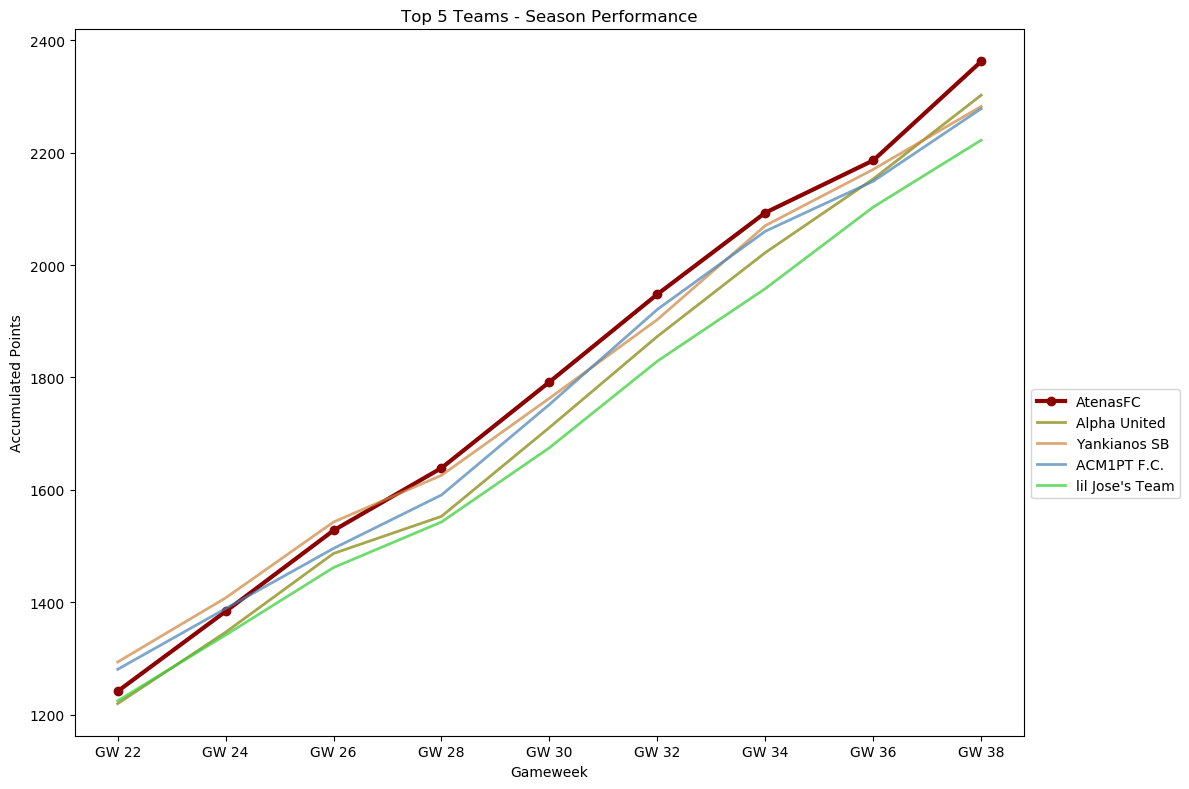

In [78]:
plt.subplots(figsize=(12,8), dpi= 100)

plt.plot(Top5['GW'][21::2], Top5['AtenasFC*'][21::2], color='darkred', marker = 'o', label='AtenasFC', linewidth=3)

plt.plot(Top5['GW'][21::2], Top5['Alpha United F.C.*'][21::2], color='olive',alpha=0.70, label='Alpha United', linewidth=2)

plt.plot(Top5['GW'][21::2], Top5['Yankianos SB*'][21::2], color='peru', alpha=0.7, label='Yankianos SB', linewidth=2)

plt.plot(Top5['GW'][21::2], Top5['ACM1PT F.C. - S.B.'][21::2], color='steelblue', alpha=0.7, label='ACM1PT F.C.', linewidth=2)

plt.plot(Top5['GW'][21::2], Top5["lil Jose's Team"][21::2], color='limegreen', alpha=0.7, label="lil Jose's Team", linewidth=2)

plt.xlabel('Gameweek')

plt.ylabel('Accumulated Points')

plt.title('Top 5 Teams - Season Performance')

plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5), fancybox=True)

plt.tight_layout()

plt.savefig('Top_5_Teams.png')

plt.show()

## Top 5 Captain Decision-Making

In [101]:
# Caps and Points DataFrames

Captains = pd.read_csv('Captains.csv')

Captains_Points = pd.read_csv('Captains_Points.csv')

Captains_Points_Top5 = Captains_Points.iloc[:, 0:5]

Captains_Points_Top5.head()

,AtenasFC*,Alpha United F.C.*,Yankianos SB*,ACM1PT F.C. - S.B.,lil Jose's Team
0,24,26,24,24,24
1,6,22,12,6,6
2,4,10,10,4,4
3,32,26,12,12,6
4,12,10,18,4,18


In [108]:
# Change values to numeric. Coerce to make TC_Points a NaN. 

Captains_Points_Top5['AtenasFC*'] = pd.to_numeric(Captains_Points_Top5["AtenasFC*"], errors='coerce')

Captains_Points_Top5['Alpha United F.C.*'] = pd.to_numeric(Captains_Points_Top5["Alpha United F.C.*"], errors='coerce')

Captains_Points_Top5['Yankianos SB*'] = pd.to_numeric(Captains_Points_Top5["Yankianos SB*"], errors='coerce')

Captains_Points_Top5['ACM1PT F.C. - S.B.'] = pd.to_numeric(Captains_Points_Top5["ACM1PT F.C. - S.B."], errors='coerce')

Captains_Points_Top5["lil Jose's Team"] = pd.to_numeric(Captains_Points_Top5["lil Jose's Team"], errors='coerce')

In [212]:
# Dataframe with booleans of "Good Cap" or "Bad Cap"

GoodCaps = pd.DataFrame()

GoodCaps['AtenasFC*'] = (Captains_Points_Top5['AtenasFC*'] > 7)

GoodCaps['Alpha United F.C.*'] = (Captains_Points_Top5['Alpha United F.C.*'] > 7)

GoodCaps['Yankianos SB*'] = (Captains_Points_Top5['Yankianos SB*'] > 7)

GoodCaps['ACM1PT F.C. - S.B.'] = (Captains_Points_Top5['ACM1PT F.C. - S.B.'] > 7)

GoodCaps["lil Jose's Team"] = (Captains_Points_Top5["lil Jose's Team"] > 7)

GoodCaps.head()

,AtenasFC*,Alpha United F.C.*,Yankianos SB*,ACM1PT F.C. - S.B.,lil Jose's Team
0,True,True,True,True,True
1,False,True,True,False,False
2,False,True,True,False,False
3,True,True,True,True,False
4,True,True,True,False,True


In [147]:
print(GoodCaps['AtenasFC*'].value_counts())

print(GoodCaps['Alpha United F.C.*'].value_counts())

print(GoodCaps['Yankianos SB*'].value_counts())

print(GoodCaps['ACM1PT F.C. - S.B.'].value_counts())

print(GoodCaps["lil Jose's Team"].value_counts())

True     23
False    15
Name: AtenasFC*, dtype: int64
True     23
False    15
Name: Alpha United F.C.*, dtype: int64
True     26
False    12
Name: Yankianos SB*, dtype: int64
True     21
False    17
Name: ACM1PT F.C. - S.B., dtype: int64
True     21
False    17
Name: lil Jose's Team, dtype: int64


### Captains Decision-Making

The following graph shows how many times the top 5 teams made the right captain choice. 

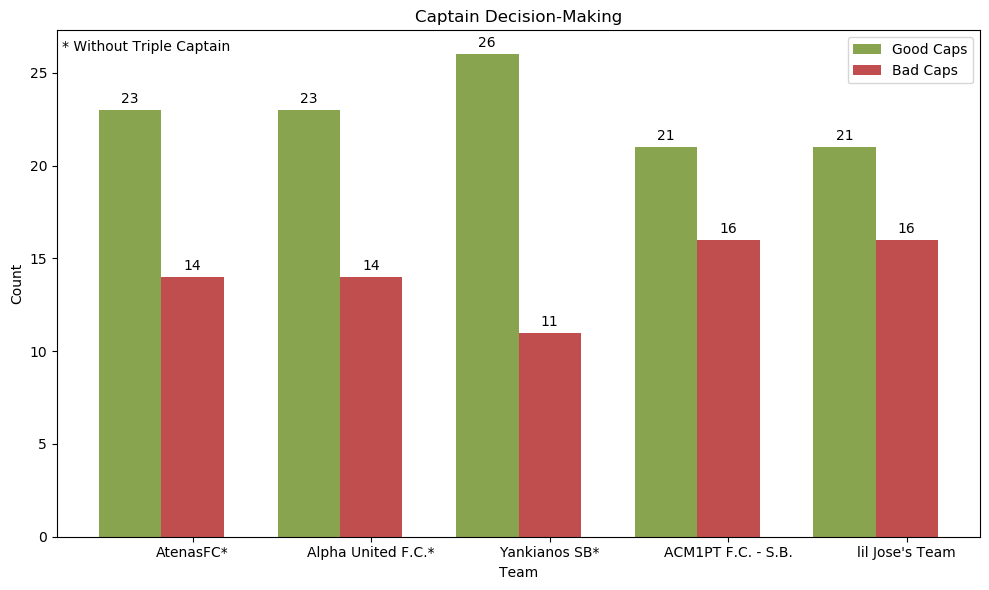

In [176]:
# Code for this graph was borrowed from https://pythonspot.com

# data to plot
n_groups = 5
Good_Caps = (23, 23, 26, 21, 21)
Bad_Caps = (14, 14, 11, 16, 16) # False counts -1 because NaN values were counted as false.

# create plot
fig, ax = plt.subplots(figsize=(10,6), dpi= 100)
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, Good_Caps, bar_width,
alpha=opacity,
color='olivedrab',
label='Good Caps')

rects2 = plt.bar(index + bar_width, Bad_Caps, bar_width,
alpha=opacity,
color='firebrick',
label='Bad Caps')

plt.xlabel('Team')
plt.ylabel('Count')
plt.title('Captain Decision-Making')
plt.xticks(index + bar_width, ('AtenasFC*', 'Alpha United F.C.*', 'Yankianos SB*', 'ACM1PT F.C. - S.B.', "lil Jose's Team"))
plt.legend()

def autolabel(rects): # Code borrowed from https://matplotlib.org
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

ax.text(.005, 0.98, '* Without Triple Captain',
        horizontalalignment='left',
        verticalalignment='top',
        transform=ax.transAxes)

plt.savefig('Captain Decision-Making.png')      

plt.tight_layout()
plt.show()

In [177]:
General_Table = pd.read_csv('Tabla_General.csv')

General_Table.head()

,Rank,Team,Total_Points,ID,Transfers,Final_Value,Transf_Points,Bench_Points
0,1,AtenasFC*,2362,1008002,64,£104.3,68,222
1,2,Alpha United F.C.*,2302,1872185,37,£102.1,12,210
2,3,Yankianos SB*,2282,725578,59,£102.2,60,315
3,4,ACM1PT F.C. - S.B.,2278,584561,44,£97.3,56,173
4,5,lil Jose's Team,2222,134325,46,£103.7,32,217


### Correlations

The next two graphs examine the correlation between points scored against transfers made and final team value.

The first graph shows that the most active teams were the ones with higher scores. The second graph shows that, generally, teams with higher final value scored more points. 

These two graphs have to be analyzed with a pintch of salt because correlation does not imply causation. Specially in the second graph we are not able to recognize which variable could be the explanatory variable. 

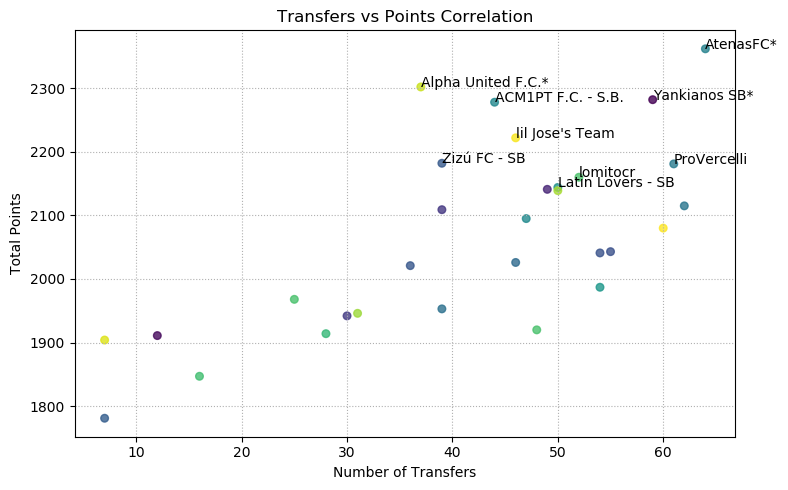

In [211]:
plt.subplots(figsize=(8, 5), dpi= 100)
plt.scatter(x = General_Table['Transfers'],
            y = General_Table['Total_Points'],
            s = 30,
            alpha = 0.8,
            c = np.random.rand(30))

plt.xlabel('Number of Transfers')

plt.ylabel('Total Points')

plt.title('Transfers vs Points Correlation')

x,y = General_Table['Transfers'][0:9], General_Table['Total_Points'][0:9]
for i, txt in enumerate (General_Table['Team'][0:9]):
    plt.annotate(txt, (x[i], y[i]))

plt.grid(linestyle='dotted')

plt.tight_layout()

plt.savefig('Transfers_vs_Points_Correlation.png')

plt.show()

In [206]:
General_Table['Final_Value'] = General_Table['Final_Value'].str.replace('£', '')

In [207]:
General_Table['Final_Value'] = pd.to_numeric(General_Table['Final_Value'])

General_Table.head()

,Rank,Team,Total_Points,ID,Transfers,Final_Value,Transf_Points,Bench_Points
0,1,AtenasFC*,2362,1008002,64,104.3,68,222
1,2,Alpha United F.C.*,2302,1872185,37,102.1,12,210
2,3,Yankianos SB*,2282,725578,59,102.2,60,315
3,4,ACM1PT F.C. - S.B.,2278,584561,44,97.3,56,173
4,5,lil Jose's Team,2222,134325,46,103.7,32,217


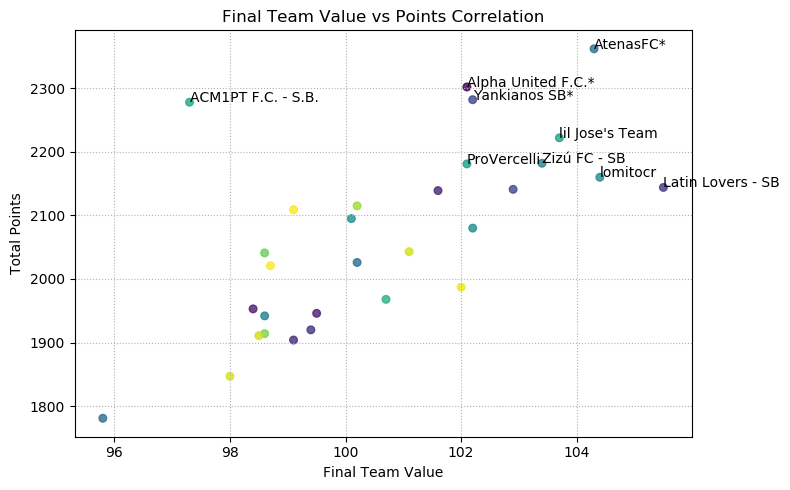

In [210]:
plt.subplots(figsize=(8, 5), dpi= 100)
plt.scatter(x = General_Table['Final_Value'],
            y = General_Table['Total_Points'],
            s = 30,
            alpha = 0.8,
            c = np.random.rand(30))

plt.xlabel('Final Team Value')

plt.ylabel('Total Points')

plt.title('Final Team Value vs Points Correlation')

x,y = General_Table['Final_Value'][0:9], General_Table['Total_Points'][0:9]
for i, txt in enumerate (General_Table['Team'][0:9]):
    plt.annotate(txt, (x[i], y[i]))

plt.grid(linestyle='dotted')

plt.tight_layout()

plt.savefig('Final Team Value_vs_Points_Correlation.png')

plt.show()